In [1]:
import numpy as np
import pandas as pd

# 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
# load numpy array
data = np.load('./data/data_pca_50_target.npz')
data.files

['arr_0', 'arr_1']

In [3]:
data.allow_pickle = True

In [4]:
X = data['arr_0'] # pca data with 50 components
y = data['arr_1'] # target or dependent variable

In [5]:
X.shape,y.shape

((4319, 50), (4319,))

In [6]:
X

array([[ 0.88136503,  0.24516001, -0.25441687, ...,  0.68307577,
        -0.283627  ,  1.22206164],
       [-0.61136643, -1.55561451, -0.12944525, ...,  1.05812879,
        -1.69662405,  0.90324002],
       [-0.7757212 , -0.31211002, -0.35348725, ..., -0.05937957,
        -0.60809394, -2.36262604],
       ...,
       [ 1.33948954,  0.60203474,  1.23716936, ...,  2.24639745,
        -0.95278518, -1.09129314],
       [-1.22807975, -0.42448538,  0.43358359, ..., -0.67268013,
        -0.78839372,  0.65418072],
       [ 1.24815325,  0.91931234, -0.1138799 , ...,  0.21684119,
         0.17563582, -0.37207461]], shape=(4319, 50))

In [7]:
y

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      shape=(4319,), dtype=object)

### split the data into train and test

In [8]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3455, 50) (864, 50) (3455,) (864,)


### training machine learning model

In [9]:
model_svc = SVC(probability=True)

param_grid = {'C':[0.5,1,10,20,30,50],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1]}

In [10]:
model_grid = GridSearchCV(model_svc,
                          param_grid=param_grid,
                          scoring='accuracy',cv=3,verbose=2)

In [11]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   2.1s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   2.1s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   2.0s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   2.5s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   2.7s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   2.5s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   1.5s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   1.7s
[CV] END ............C=0.5, coef0=0, gamma=0.0

,estimator,SVC(probability=True)
,param_grid,"{'C': [0.5, 1, ...], 'coef0': [0, 1], 'gamma': [0.1, 0.05, ...], 'kernel': ['rbf', 'poly']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [12]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.01, 'kernel': 'rbf'}

In [13]:
model_final = model_grid.best_estimator_

In [14]:
model_final.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Model Evaluation
- Classification Report
    - Precision, Recall, F1-Score
- Kappa Score
    - -ve (worst model)
    - 0 to 0.5 (bad model)
    - 0.5 to 0.7 (Good Model)
    - 0.7 to 0.9 (Excellent Model)
    - 0.9 to 1.0 (Perfect Model)
- AUC
    - Less than 0.5 (Worst Model)
    - 0.5 to 0.6 (Bad Model)
    - 0.6 to 0.8 (Good Model)
    - 0.8 to 0.9 (Excellent Model)
    - 0.9 to 1.0 (Perfect Model)

In [15]:
y_pred = model_final.predict(x_test) # predicted values

In [16]:
y_pred

array(['male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'female', 'female', 'male', 'male', 'female',
       'female', 'female', 'male', 'female', 'female', 'male', 'female',
       'male', 'female', 'male', 'female', 'male', 'female', 'male',
       'female', 'female', 'female', 'male', 'male', 'male', 'female',
       'female', 'female', 'female', 'female', 'male', 'female', 'male',
       'female', 'female', 'female', 'female', 'male', 'male', 'female',
       'female', 'female', 'male', 'female', 'female', 'male', 'female',
       'female', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'male', 'female', 'male',
       'female', 'male', 'female', 'female', 'male', 'male', 'female',
       'male', 'male', 'male', 'female', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'female', 'female',
       'female', 'female', 'female', 'male', 'female', 'female', 'male',
  

**Classification Report**

In [17]:
cr = metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
female,0.790224,0.813417,0.801653,477.000000
male,0.761394,0.733850,0.747368,387.000000
accuracy,0.777778,0.777778,0.777778,0.777778
macro avg,0.775809,0.773634,0.774511,864.000000
weighted avg,0.777311,0.777778,0.777338,864.000000


**Kappa Score**

In [18]:
metrics.cohen_kappa_score(y_test,y_pred)

0.5491414314368182

**Area Under Curve (AUC)**

In [19]:
metrics.roc_auc_score(np.where(y_test=="male",1,0),
                      np.where(y_pred=="male",1,0))

0.7736336599873239

#### Save Face Recognition Model

In [20]:
import pickle

In [21]:
pickle.dump(model_final,open('./model/model_svm.pickle',mode='wb'))

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
cv_results = pd.DataFrame(model_grid.cv_results_)

In [24]:
param = ['param_C','param_coef0','param_gamma','param_kernel']
cv_results = cv_results[param+['mean_test_score']]
cv_results[param] = cv_results[param].astype(str)

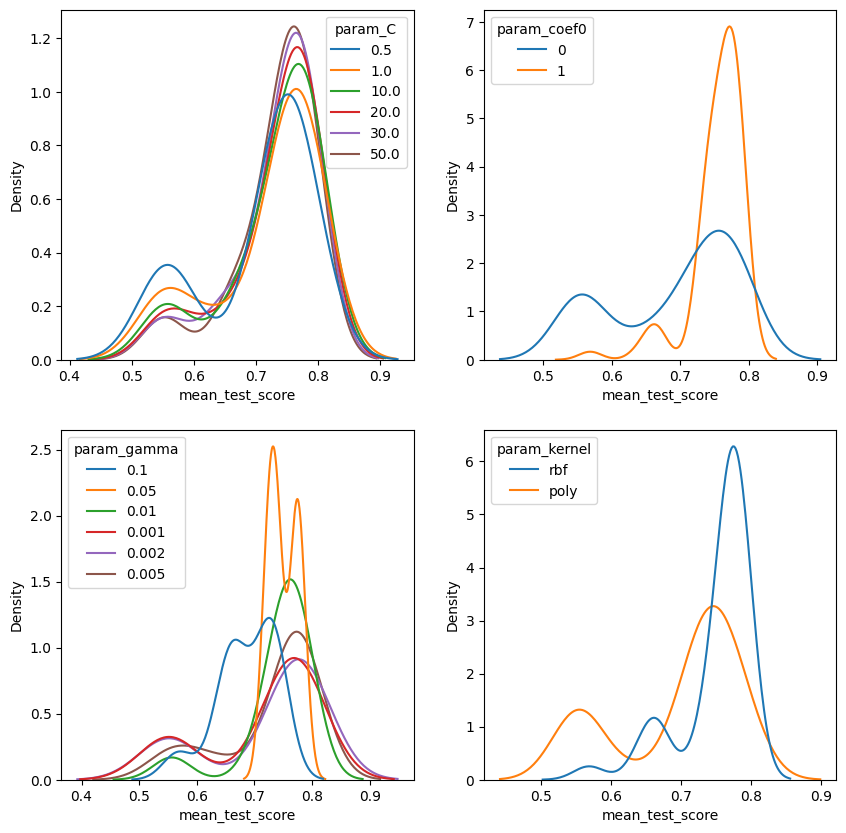

In [25]:
plt.figure(figsize=(10,10))
for i, par in enumerate(param):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=cv_results,x='mean_test_score',hue=par)

In [26]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.01, 'kernel': 'rbf'}